In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#read data
df = pd.read_csv('../../../Data/Cluster.csv',index_col='T',parse_dates=True)
A = df.as_matrix()

In [5]:
k_means = KMeans(n_clusters=2, n_init=10,init='random')
k_means.fit(A)
labels = k_means.labels_
centers = k_means.cluster_centers_


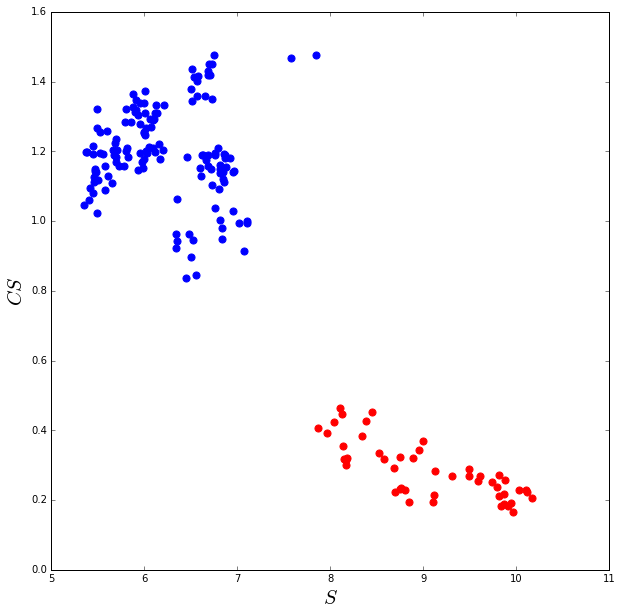

In [6]:
fig = plt.figure(figsize=[10,10])
idx_0 = labels ==0
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='red')
idx_0 = labels ==1
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='blue')
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)

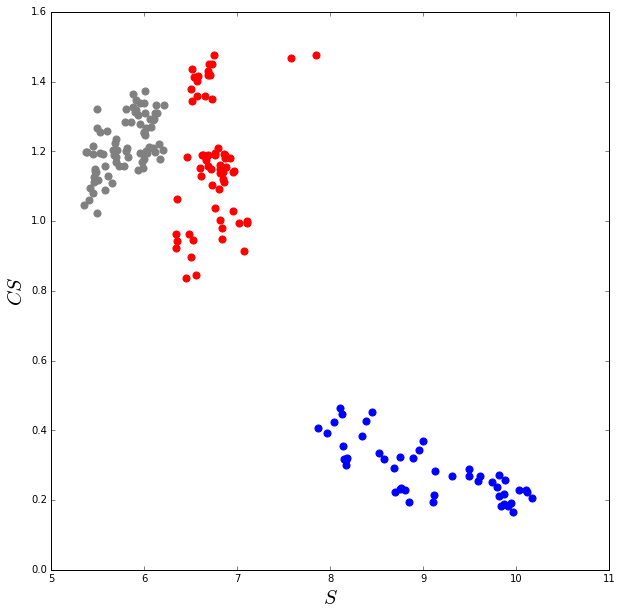

In [7]:
k_means = KMeans(n_clusters=3, n_init=10,init='random')
k_means.fit(A)
labels = k_means.labels_
centers = k_means.cluster_centers_
fig = plt.figure(figsize=[10,10])
idx_0 = labels ==0
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='red')
idx_0 = labels ==1
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='blue')
idx_2 = labels ==2
plt.scatter(A[idx_2,0],A[idx_2,1],s=50,color='gray')
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)

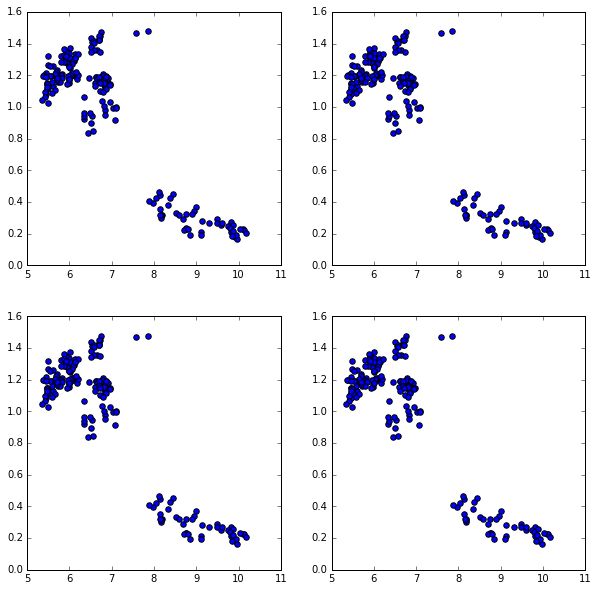

In [8]:
fig = plt.figure(figsize=[10,10])
i=0
for n in [1,2,3,4]:
    i += 1
    ax=plt.subplot(2,2,i)
    k_means = KMeans(n_clusters=5, n_init=1,init='random',max_iter=n)
    k_means.fit(A)
    idx_0 = labels ==0
    ax.scatter(A[idx_0,0],A[idx_0,1],s=30)
    idx_0 = labels ==1
    ax.scatter(A[idx_0,0],A[idx_0,1],s=30)
    idx_2 = labels ==2
    ax.scatter(A[idx_2,0],A[idx_2,1],s=30)    
    idx_3 = labels ==3
    ax.scatter(A[idx_3,0],A[idx_3,1],s=30) 
    idx_4 = labels ==4
    ax.scatter(A[idx_4,0],A[idx_4,1],s=30) 

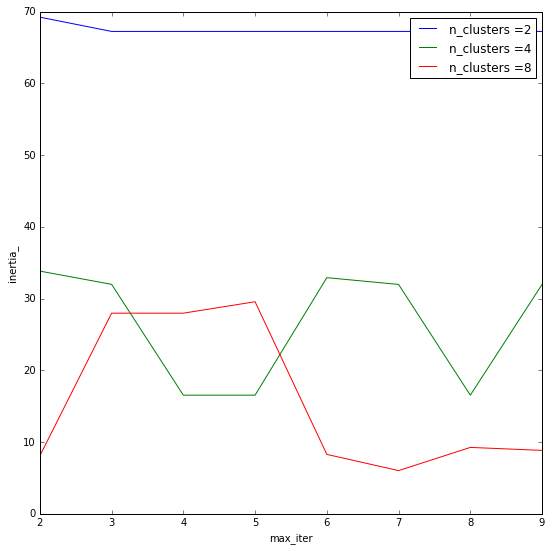

In [9]:
nbr = np.arange(2,10,1)
clusters = [2,4,8]
dist = np.zeros(shape=(len(nbr),len(clusters)))
i=0
for n in nbr:
    j = 0
    
    for c in clusters:
        k_means = KMeans(n_clusters=c, n_init=1,init='random',max_iter=n)
        k_means.fit(A)
        dist[i,j] = k_means.inertia_
        j +=1
    i +=1
    

fig = plt.figure(figsize=(9,9))
i=0
for c in clusters:
    plt.plot(nbr,dist[:,i],label='n_clusters =' + str(c))
    i +=1
plt.legend() 
plt.xlabel('max_iter')
plt.ylabel('inertia_')

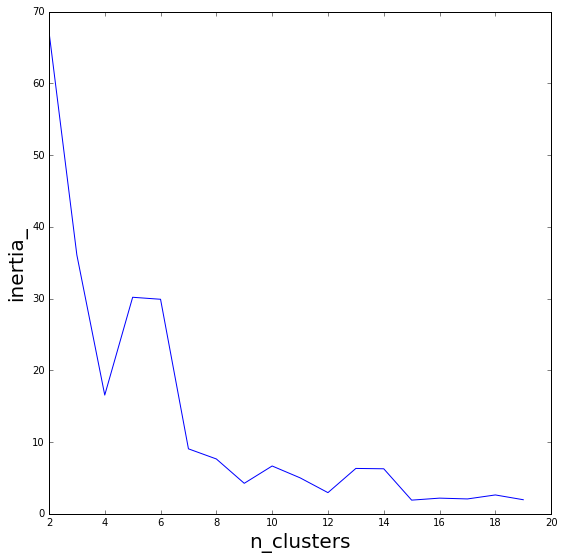

In [10]:
clusters = np.arange(2,20,1)
dist = np.zeros(shape=(len(clusters),1))
i = 0
for c in np.arange(2,20,1):
    k_means = KMeans(n_clusters=c, n_init=1,init='random')
    k_means.fit(A)
    dist[i,0]=k_means.inertia_
    i +=1

fig = plt.figure(figsize=(9,9))
plt.plot(clusters,dist[:,0])
plt.xlabel('n_clusters',fontsize=20)
plt.ylabel('inertia_',fontsize=20)

